#**Spotify Data**

##**The Track Properties**

1. **Genre** : The genre of the track
2. **Artist Name** : The name of artist
3. **Track Name** : The Name of the track
4. **Track Id** : ID of the track on spotify
5. **Popularity** : The higher the value, the more popular the song is
6. **Acousticness** : The higher the value, the more acoustic the song is
7. **Dancebility** : The higher the value, the easier it is to dance to this song
8. **Duration_ms** : The length of the song in miliseconds
9. **Energy** : The energy of a song - The higher the value, the more energetic the song is
10. **Instrumentalness** : Represents the amount of vocals in the song. The higher the value, the more instrumental the song is.
11. **Key** : The estimated overall key of the track.
12. **Liveness** : Describes the probability that the song was recorded with a live audience. The higher the value, the more likely the song is a live recording
13. **Loudness** : The higher the value, the louder the song is.
14. **Mode** : The mode of the track. Either major or minor
15. **Speechiness** : The higher the value, the more spoken word the song contains.
16. **Tempo** : The overall estimated tempo of a track in Beats Per Minute (BPM)
17. **Time Signature** : An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure)
18. **Valence** : The higher the value, the more positive mood for the song.

##**Library**
First thing first, import the library that we need to support our project

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

##**Opening the Data Sets**

In [2]:
data = pd.read_csv('SpotifyFeatures.csv')
print(f'Dataset contains {data.shape[0]} rows and {data.shape[1]} columns')
data.head()

Dataset contains 232725 rows and 18 columns


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4-Apr,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4-Apr,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,4-May,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4-Apr,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4-Apr,0.390


In [3]:
data.shape

(232725, 18)

## **Explore the Data**

### Inspect Structure
First thing to do with our data, is to take a peek onto its structure. Let's use info, describe, and head to see it. 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
genre               232725 non-null object
artist_name         232725 non-null object
track_name          232725 non-null object
track_id            232725 non-null object
popularity          232725 non-null int64
acousticness        232725 non-null float64
danceability        232725 non-null float64
duration_ms         232725 non-null int64
energy              232725 non-null float64
instrumentalness    232725 non-null float64
key                 232725 non-null object
liveness            232725 non-null float64
loudness            232725 non-null float64
mode                232725 non-null object
speechiness         232725 non-null float64
tempo               232725 non-null float64
time_signature      232725 non-null object
valence             232725 non-null float64
dtypes: float64(9), int64(2), object(7)
memory usage: 32.0+ MB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,232725.0,41.127502,18.189948,0.00000,29.0000,43.000000,55.0000,100.000
acousticness,232725.0,0.368560,0.354768,0.00000,0.0376,0.232000,0.7220,0.996
danceability,232725.0,0.554364,0.185608,0.05690,0.4350,0.571000,0.6920,0.989
duration_ms,232725.0,235122.339306,118935.909299,15387.00000,182857.0000,220427.000000,265768.0000,5552917.000
energy,232725.0,0.570958,0.263456,0.00002,0.3850,0.605000,0.7870,0.999
instrumentalness,232725.0,0.148301,0.302768,0.00000,0.0000,0.000044,0.0358,0.999
liveness,232725.0,0.215009,0.198273,0.00967,0.0974,0.128000,0.2640,1.000
loudness,232725.0,-9.569885,5.998204,-52.45700,-11.7710,-7.762000,-5.5010,3.744
speechiness,232725.0,0.120765,0.185518,0.02220,0.0367,0.050100,0.1050,0.967
tempo,232725.0,117.666585,30.898907,30.37900,92.9590,115.778000,139.0540,242.903


In [6]:
data.describe(include=['O']).T

,count,unique,top,freq
genre,232725,27,Comedy,9681
artist_name,232725,14564,Giuseppe Verdi,1394
track_name,232725,148608,Home,100
track_id,232725,176774,6sVQNUvcVFTXvlk3ec0ngd,8
key,232725,12,C,27583
mode,232725,2,Major,151744
time_signature,232725,5,4-Apr,200760


### Check for missing values

In [7]:
data.isna().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

### Check for duplicates

Each row of this data represents a song. However, there are songs that labelled into multiple genre. Take a look at this data

In [0]:
duplicated_all = data[data.duplicated(subset = 'track_id', keep=False)]
duplicated = data[data.duplicated(subset = 'track_id', keep='first')]

In [9]:
data[data['track_id'] == duplicated['track_id'].iloc[0]]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
257,R&B,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4-Apr,0.7
1348,Alternative,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4-Apr,0.7
77710,Children’s Music,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4-Apr,0.7
93651,Indie,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4-Apr,0.7
113770,Pop,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4-Apr,0.7


In [10]:
print(f'''Unique Duplicates: {duplicated.shape[0]}
Total Duplicates: {duplicated_all.shape[0]}
Total Data: {data.shape[0]}
Duplicates %: {round(duplicated_all.shape[0]/data.shape[0]*100, 2)}''')

Unique Duplicates: 55951
Total Duplicates: 91075
Total Data: 232725
Duplicates %: 39.13


### Feature Engineering

Now, we need our data to be able to be applied with mathematical expressions (since that how machine learning do that). So, let's change several feature values and cast them into numerical.

In [11]:
data.select_dtypes(exclude='number').head()

,genre,artist_name,track_name,track_id,key,mode,time_signature
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,C#,Major,4-Apr
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,F#,Minor,4-Apr
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,C,Minor,4-May
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,C#,Major,4-Apr
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,F,Major,4-Apr


In [12]:
data['time_signature'].unique().tolist()

['4-Apr', '4-May', '4-Mar', '4-Jan', '0/4']

I assume changing its value into the first numeric value (ie: 4/4 -> 4) won't remove the informations, because all the signature have and supposed to be have the same denominator. 

In [13]:
data['mode'].unique().tolist()

['Major', 'Minor']

Let's change the value of Major -> 1 and Minor -> 0. Even if it's not a numerical, but since it's only have 2 value, we can change it into binary (0,1). With 0 means the absence of Major (wich means Minor), and 1 means the occurence of Major

In [14]:
data['key'].unique().tolist()

['C#', 'F#', 'C', 'F', 'G', 'E', 'D#', 'G#', 'D', 'A#', 'A', 'B']

In music theory, the basic scale used are chromatic scale, wich divide the tone into 12 keys (C, C#, D, D#, E, F, F#, G, G#, A, A#, B). If you are curious enough, you may visit Daniel White's dissertation: [Potential Mathematical Models for the Western Musical Scale](https://www.skytopia.com/music/theory/scale-dissertation.html), or his [blogpost](https://www.skytopia.com/project/scale.html)


Since it contains the value of order, we can safely transform the key into numerical representations. 
Let's say, 1 to 12.

In [15]:
mode_dict = {'Major' : 1, 'Minor' : 0}
key_dict = {'C' : 1, 'C#' : 2, 'D' : 3, 'D#' : 4, 'E' : 5, 'F' : 6, 
        'F#' : 7, 'G' : 8, 'G#' : 9, 'A' : 10, 'A#' : 11, 'B' : 12}

data['time_signature'] = data['time_signature'].apply(lambda x : int(x[0]))
data['mode'].replace(mode_dict, inplace=True)
data['key'] = data['key'].replace(key_dict).astype(int)

data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,2,0.3460,-1.828,1,0.0525,166.969,4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,7,0.1510,-5.559,0,0.0868,174.003,4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,1,0.1030,-13.879,0,0.0362,99.488,4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,2,0.0985,-12.178,1,0.0395,171.758,4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,6,0.2020,-21.150,1,0.0456,140.576,4,0.390


Let's save this dataframe, so that we can use it later. when we want

In [0]:
data.to_csv('clean_df.csv')

### Correlation

In [0]:
def corr_heatmap(data):
    corr_matrix = data.corr()
    mask = np.zeros_like(corr_matrix)
    mask[np.triu_indices_from(mask)]= True
    f, ax = plt.subplots(figsize=(11, 15)) 
    heatmap = sns.heatmap(corr_matrix, 
                          mask = mask,
                          square = True,
                          linewidths = .5,
                          cmap = 'coolwarm',
                          cbar_kws = {'shrink': .4, 
                                    'ticks' : [-1, -.5, 0, 0.5, 1]},
                          vmin = -1, 
                          vmax = 1,
                          fmt = '.2f',
                          annot = True,
                          annot_kws = {'size': 12}) #add the column names as labels
    ax.set_yticklabels(corr_matrix.columns, rotation = 0)
    ax.set_xticklabels(corr_matrix.columns)
    sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

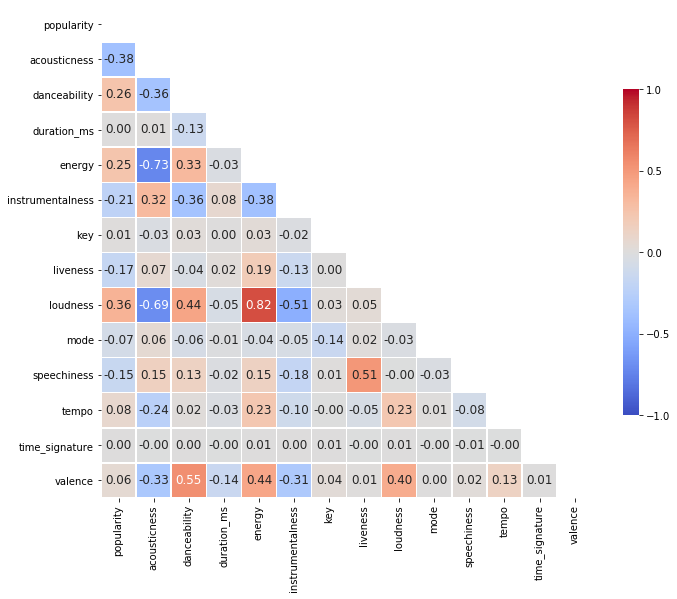

In [18]:
corr_heatmap(data)